## Line broadening

In [18]:
#Libraries
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy.polynomial.polynomial as poly
from numpy.polynomial import Polynomial
import scipy.constants as const

#Configuration for the font and style in the graphics
params = {
        'font.family': 'serif',
        'font.serif': ['STIXGeneral', 'Times New Roman'],
        'font.size': 12,
        'axes.labelsize': 12,
        'axes.titlesize': 14,
        'legend.fontsize': 13,
        'xtick.labelsize': 13,
        'ytick.labelsize': 13,
        'mathtext.fontset': 'stix',
        'text.usetex': False,
        'figure.figsize': (6.4, 4.8),
        'savefig.format': 'pdf',
        'savefig.bbox': 'tight'
    }
    
plt.rcParams.update(params)

In [19]:
#Lines from the excel files
VIS_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Visible range\Data\valores_VIS.xlsx")
NIR_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Infrared range\Data\valores_NIR.xlsx")
SPA_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Spatially Resolved Atlas\values_SPA.xlsx")

#colors for the plot
colors_fit = ['purple','blue','cyan','green','yellow','orange','red','brown']

### Core curvature vs Line Depth

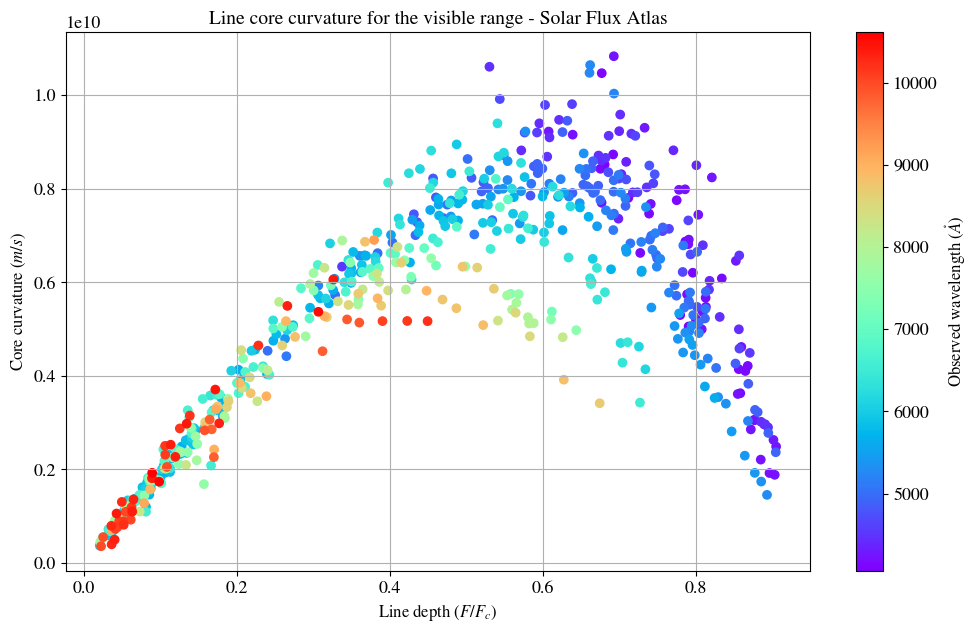

In [20]:
fig1, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(1-VIS_data['Flux'],VIS_data['Core curvature'],c=VIS_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.set_title('Line core curvature for the visible range - Solar Flux Atlas',fontsize=14)
ax.set_xlabel(r'Line depth $(F/F_{c})$',fontsize=12)
ax.set_ylabel(r'Core curvature $(m/s)$',fontsize=12)
ax.grid()

# fig1.savefig('Curvature_VIS.pdf')

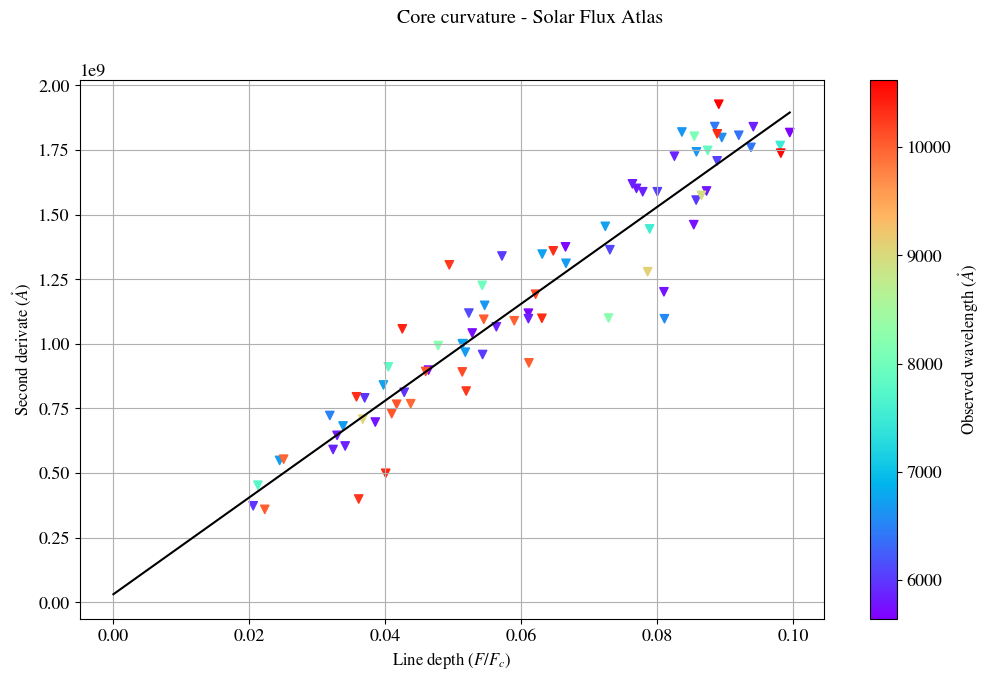

In [36]:
#In the report is given in function of the velocity
values_VIS_standard = VIS_data[VIS_data['Line Depth'].between(0.0,0.1,inclusive='right')]

pol = Polynomial.fit(values_VIS_standard['Line Depth'],values_VIS_standard['Core curvature'], 1)
param = pol.convert().coef
values_vel = np.linspace(0, max(values_VIS_standard['Line Depth']), len(values_VIS_standard['Line Depth']))
vel_fit = pol(values_vel)

#Plot for fixed the zero point of velocity
fig2, ax1 = plt.subplots(1,1,figsize=(12,7))

fig2.suptitle(r'Core curvature - Solar Flux Atlas')

scatter = ax1.scatter(values_VIS_standard['Line Depth'],values_VIS_standard['Core curvature'],c=values_VIS_standard["Observed wavelength"],cmap='rainbow',lw=1,marker='v')
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax1.plot(values_vel,vel_fit,c='k')
ax1.set_ylabel(r'Second derivate $(\mathring{A})$')
ax1.set_xlabel(r'Line depth $(F/F_{c})$')
ax1.grid()
ax1.tick_params(axis='both',labelsize=13)

In [37]:
param

array([3.11096970e+07, 1.87386888e+10])

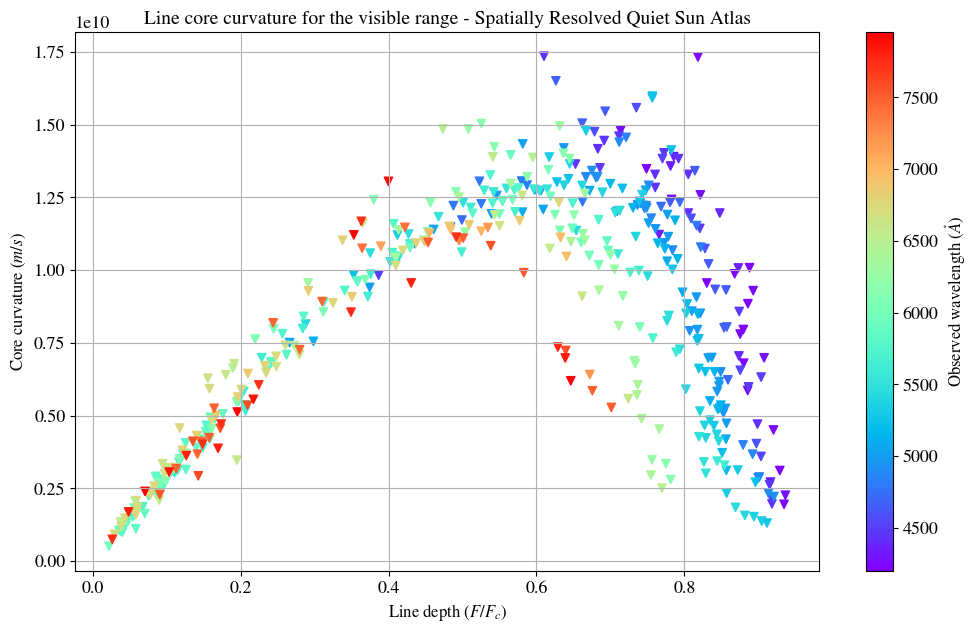

In [23]:
fig2, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(1-SPA_data['Flux'],SPA_data['Core curvature'],c=SPA_data["Observed wavelength"],cmap='rainbow',lw=1,marker='v')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.set_title('Line core curvature for the visible range - Spatially Resolved Quiet Sun Atlas',fontsize=14)
ax.set_xlabel(r'Line depth $(F/F_{c})$',fontsize=12)
ax.set_ylabel(r'Core curvature $(m/s)$',fontsize=12)
ax.grid()

# fig2.savefig('Curvature_SPA.pdf')

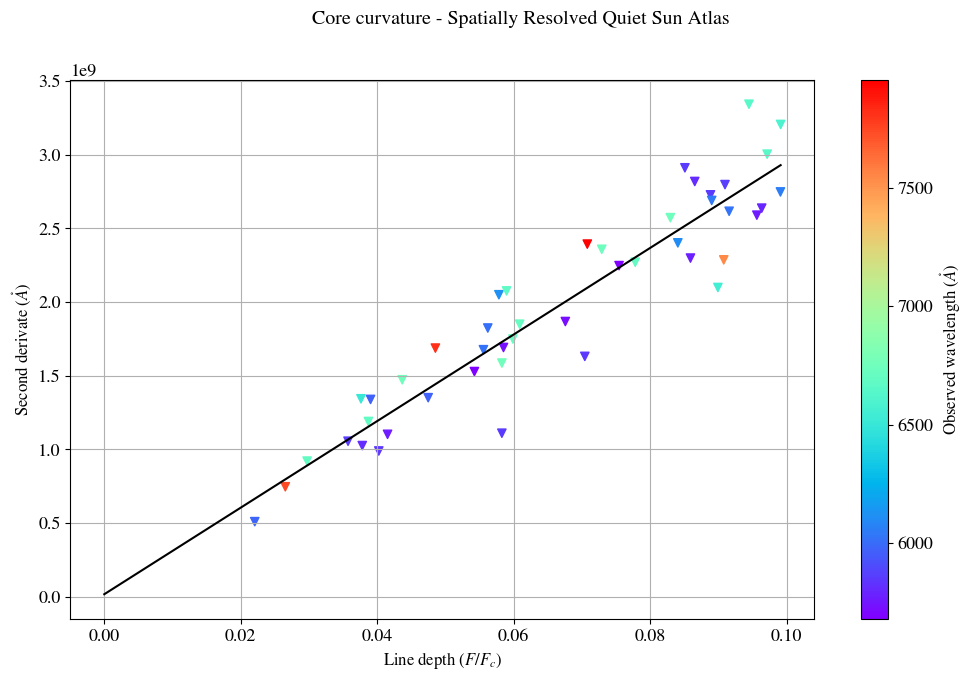

In [32]:
#In the report is given in function of the velocity
values_VIS_standard = SPA_data[SPA_data['Line Depth'].between(0.0,0.1,inclusive='right')]

pol = Polynomial.fit(values_VIS_standard['Line Depth'],values_VIS_standard['Core curvature'], 1)
param = pol.convert().coef
values_vel = np.linspace(0, max(values_VIS_standard['Line Depth']), len(values_VIS_standard['Line Depth']))
vel_fit = pol(values_vel)

#Plot for fixed the zero point of velocity
fig2, ax1 = plt.subplots(1,1,figsize=(12,7))

fig2.suptitle(r'Core curvature - Spatially Resolved Quiet Sun Atlas')

scatter = ax1.scatter(values_VIS_standard['Line Depth'],values_VIS_standard['Core curvature'],c=values_VIS_standard["Observed wavelength"],cmap='rainbow',lw=1,marker='v')
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax1.plot(values_vel,vel_fit,c='k')
ax1.set_ylabel(r'Second derivate $(\mathring{A})$')
ax1.set_xlabel(r'Line depth $(F/F_{c})$')
ax1.grid()
ax1.tick_params(axis='both',labelsize=13)

In [33]:
param

array([1.81736361e+07, 2.93603031e+10])

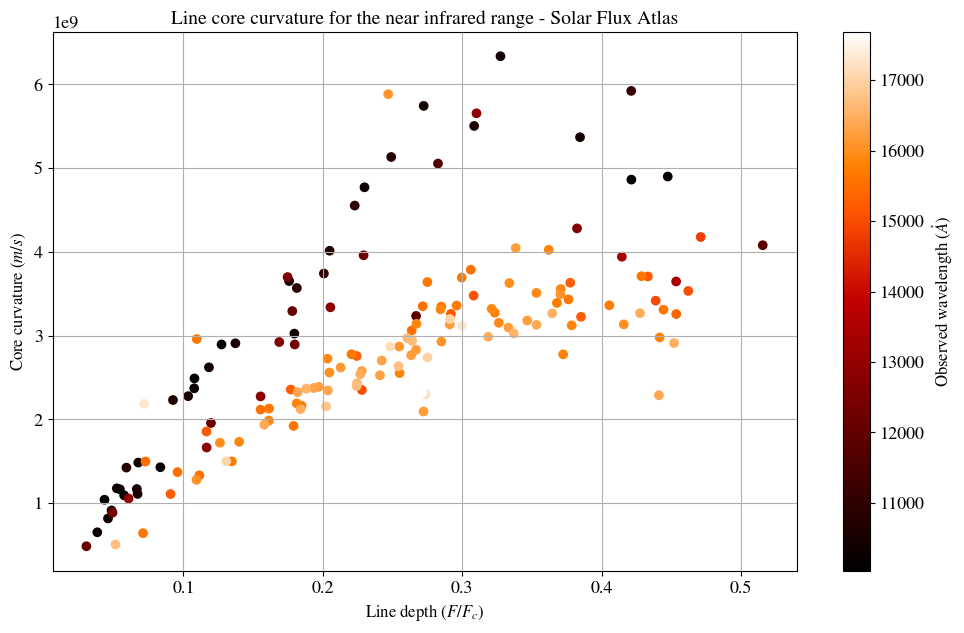

In [26]:
fig3, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(1-NIR_data['Flux'],NIR_data['Core curvature'],c=NIR_data["Observed wavelength"],cmap='gist_heat',lw=1,marker='o')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.set_title('Line core curvature for the near infrared range - Solar Flux Atlas',fontsize=14)
ax.set_xlabel(r'Line depth $(F/F_{c})$',fontsize=12)
ax.set_ylabel(r'Core curvature $ (m/s)$',fontsize=12)
ax.grid()

# fig3.savefig('Curvature_NIR.pdf')

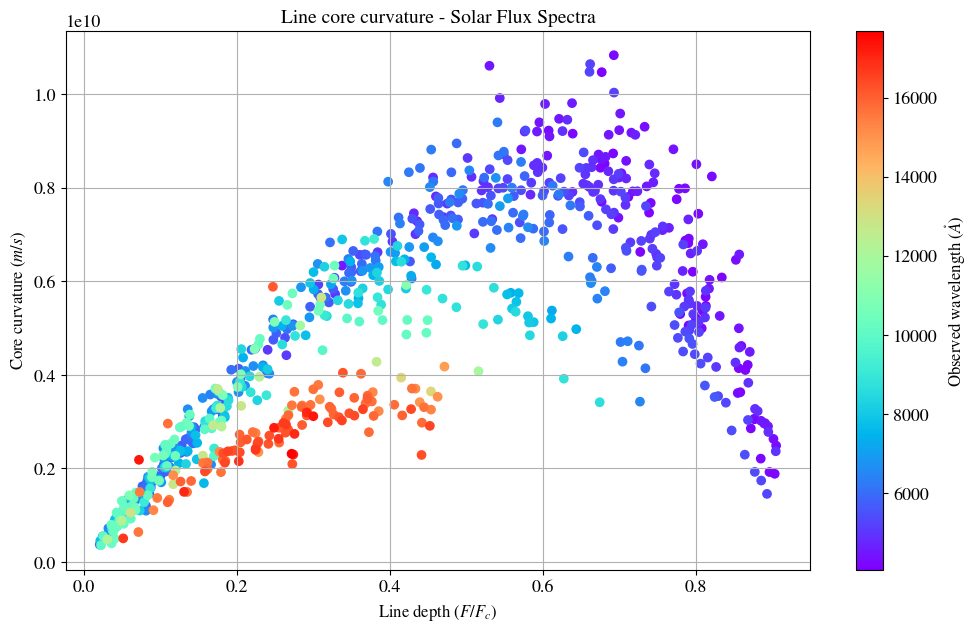

In [27]:
fig4, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(pd.concat([1-VIS_data['Flux'],1-NIR_data['Flux']],axis=0),
                     pd.concat([VIS_data['Core curvature'],NIR_data['Core curvature']],axis=0),
                     c=pd.concat([VIS_data["Observed wavelength"],NIR_data["Observed wavelength"]],axis=0),cmap='rainbow',lw=1,marker='o')


cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.set_title('Line core curvature - Solar Flux Spectra',fontsize=14)
ax.set_xlabel(r'Line depth $(F/F_{c})$',fontsize=12)
ax.set_ylabel(r'Core curvature $(m/s)$',fontsize=12)

ax.grid()

# fig4.savefig('Sharpness_ALL.pdf')